# **Implementing a Simple MLP for Disease Prediction Using NHANES Dataset**

## **Introduction**

In this assignment, you will preprocess the National Health and Nutrition Examination Survey (NHANES) dataset and implement a simple Multi-Layer Perceptron (MLP) from scratch using NumPy. The goal is to predict the occurrence of either Cancer or Liver disease based on various health and demographic features.

## **Dataset Overview**

The NHANES dataset provides a comprehensive set of health and nutritional data collected through interviews and medical examinations. It includes information on demographics, dietary habits, medical history, and laboratory results.

### **Data Components:**

- **Demographics:** Information about age, gender, ethnicity, etc.
- **Diet:** Dietary intake and related questions.
- **Examination:** Medical and physiological measurements.
- **Labs:** Laboratory test results.

You can refer to the following links for detailed explanations of each component:

- [Demographics](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=demographic&CycleBeginYear=2013)
- [Diet](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=diet&CycleBeginYear=2013)
- [Examination](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=examination&CycleBeginYear=2013)
- [Labs](https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=labs&CycleBeginYear=2013)

## **Tasks Overview**

1. **Data Preprocessing**
2. **Model Training**
3. **Implementing MLP from Scratch**
4. **Training and Evaluating the Model**

---

## **1. Data Preprocessing**

Data preprocessing is a critical step in any machine learning project. It involves cleaning and transforming raw data to make it suitable for analysis and modeling.

### **1.1. Import Necessary Libraries**


In [528]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler

### **1.2. Load the Dataset**

You will be provided with four CSV files corresponding to different components of the NHANES dataset. Your first task is to load these datasets.

In [529]:
# ##TODO: Load the datasets into pandas DataFrames
df1 = pd.read_csv("./Dataset/demographic.csv")
df2 = pd.read_csv("./Dataset/diet.csv ")
df3 = pd.read_csv("./Dataset/examination.csv")
df4 = pd.read_csv("./Dataset/labs.csv")

In [530]:
print(len(df1.columns))
for column in df1.columns:
    if df1[column].isna().mean() >= 0.5:
        df1.drop(column, axis=1, inplace=True)
        
print(len(df1.columns))

47
41


In [531]:
print(len(df2.columns))
for column in df2.columns:
    if df2[column].isna().mean() >= 0.5:
        df2.drop(column, axis=1, inplace=True)

print(len(df2.columns))

168
112


In [532]:
print(len(df3.columns))
for column in df3.columns:
    if df3[column].isna().mean() >= 0.5:
        df3.drop(column, axis=1, inplace=True)

print(len(df3.columns))

224
113


In [533]:
print(len(df4.columns))
for column in df4.columns:
    if df4[column].isna().mean() >= 0.5:
        df4.drop(column, axis=1, inplace=True)

print(len(df4.columns))

424
152


**Explanation:**

- `df1` to `df4` correspond to Demographics, Diet, Examination, and Labs datasets respectively.
- Use `pd.read_csv()` to load each CSV file.

### **1.3. Merge the Datasets**

After loading the datasets, you need to merge them into a single DataFrame for easier analysis.

In [534]:
# ##TODO: Merge the DataFrames on a common column, typically 'SEQN'
merged_df = df1.merge(df2, on='SEQN', how='inner') \
               .merge(df3, on='SEQN', how='inner') \
                .merge(df4, on='SEQN', how='inner')

**Explanation:**

- The `SEQN` column is a unique identifier that can be used to merge the datasets.
- Ensure that the merge is performed correctly to include all relevant data.

### **1.4. Exploratory Data Analysis (EDA)**

Perform EDA to understand the structure and statistical properties of the dataset.

In [535]:
# Display the shape of the dataset
merged_df.shape

# Display basic statistics
merged_df.describe()

# Display the first few rows
merged_df.head(10)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,8,2,1,69,4,4,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,8,2,1,54,3,3,1.0,2.0,1,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,8,2,1,72,3,3,2.0,1.0,1,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,8,2,1,9,3,3,1.0,NaN,1,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,8,2,2,73,3,3,1.0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1
5,73562,8,2,1,56,1,1,1.0,1.0,1,...,187.63,2.38,0.0,13.99,254.62,0.0,197.0,1.187,750.0,553.5
6,73563,8,2,1,0,3,3,2.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,8,2,2,61,3,3,2.0,2.0,1,...,195.62,2.48,0.0,16.80,305.76,0.0,21.0,0.236,668.0,493.0
8,73566,8,2,2,56,3,3,1.0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,157.0,2.492,378.0,279.0
9,73567,8,2,1,65,3,3,2.0,2.0,1,...,174.38,2.21,0.0,7.22,131.40,0.0,58.0,0.558,194.0,143.2


**Explanation:**

- Use `.shape` to get the dimensions.
- Use `.describe()` for statistical summary.
- Use `.head()` to view the first few rows.

### **1.5. Handle Columns with Fixed Values**

Remove columns that have only one unique value as they do not contribute to the predictive power.

In [536]:
merged_df.nunique()

SEQN        9813
SDDSRVYR       1
RIDSTATR       1
RIAGENDR       2
RIDAGEYR      81
            ... 
LBDBMNLC       1
URXVOL1      409
URDFLOW1    2147
LBDB12      1065
LBDB12SI    1065
Length: 415, dtype: int64

In [537]:
# ##TODO: Identify and drop columns with only one unique value
uniq = merged_df.nunique()
dropcols = uniq[uniq == 1]
merged_df.drop(dropcols.keys(), axis=1, inplace=True)
merged_df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,1,69,4,4,1.0,1.0,1,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,1,54,3,3,1.0,2.0,1,1.0,3.0,...,6.0,0.0,204.73,2.60,8.15,148.33,90.0,1.636,507.0,374.2
2,73559,1,72,3,3,2.0,1.0,1,1.0,4.0,...,6.3,0.0,209.64,2.66,9.57,174.17,66.0,NaN,732.0,540.2
3,73560,1,9,3,3,1.0,NaN,1,1.0,NaN,...,4.4,0.0,169.82,2.16,13.07,237.87,61.0,0.575,NaN,NaN
4,73561,2,73,3,3,1.0,2.0,1,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,26,2,2,2.0,2.0,1,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.462,720.0,531.4
9809,83728,2,2,1,1,2.0,NaN,1,1.0,NaN,...,1.0,1.0,173.87,2.21,12.64,230.05,NaN,NaN,NaN,NaN
9810,83729,2,42,4,4,2.0,2.0,2,1.0,5.0,...,32.4,0.0,228.46,2.90,10.33,188.01,73.0,0.619,388.0,286.3
9811,83730,1,7,2,2,1.0,NaN,1,1.0,NaN,...,5.1,0.0,179.73,2.28,11.04,200.93,122.0,NaN,NaN,NaN


**Explanation:**

- Columns with a single unique value are not useful for modeling.
- Identify such columns using `.nunique()` and drop them.

### **1.6. Handle Missing Values and Inconsistencies**

Replace specific codes (`7` and `9`) with `NaN` and handle missing values appropriately.


In [538]:
merged_df.isna().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
RIDRETH3       0
            ... 
LBDBMNSI    4598
URXVOL1     1756
URDFLOW1    2663
LBDB12      4497
LBDB12SI    4497
Length: 409, dtype: int64

In [539]:
import re
# Define a function to replace specific patterns with NaN
def replace_with_nan(element, pattern):
    try:
        if re.match(pattern, str(int(element))):
            return np.nan
        return element
    except:
        return element

# Replace '7's with NaN
pattern_7 = r'^7+$'
merged_df = merged_df.applymap(lambda x: replace_with_nan(x, pattern_7))

# Replace '9's with NaN
pattern_9 = r'^9+$'
merged_df = merged_df.applymap(lambda x: replace_with_nan(x, pattern_9))

# Drop columns with more than 30% missing values
for column in merged_df.columns:
    if merged_df[column].isna().mean() >= 0.3:
        merged_df.drop(column, axis=1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\1777233773.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: replace_with_nan(x, pattern_7))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\1777233773.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: replace_with_nan(x, pattern_9))


**Explanation:**

- Use regex patterns to identify and replace values.
- Drop columns that have a high percentage of missing values to maintain data quality.

### **1.7. Segregate Numerical and Categorical Variables**

Differentiate between numerical and categorical variables for appropriate preprocessing.

In [540]:
# # Identify numerical variables
# numerical = merged_df._get_numeric_data().columns

# print('There are {} numerical variables\n'.format(len(numerical)))
# #print('The numerical variables are :', numerical)
# merged_df[numerical].head()

# # Identify categorical variables
# categorical = categorical = merged_df.select_dtypes(include=['object']).columns
# #merged_df[categorical].head()

In [541]:
# Identify categorical variables
int_cols = merged_df.select_dtypes(include=['int64']).columns.tolist()
numerical_int_cols = [
    col for col in int_cols
    if np.unique(merged_df[col].values).size > 10
]
float_cols = merged_df.select_dtypes(include=['float64']).columns.tolist()
numerical = float_cols + numerical_int_cols
print('There are {} numerical variables\n'.format(len(numerical)))
merged_df[numerical].head()

There are 235 numerical variables



,SEQN,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,...,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1,SDMVSTRA
0,73557.0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821,112
1,73558.0,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636,108
2,73559.0,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN,109
3,73560.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575,109
4,73561.0,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109,116


In [542]:
#print('The numerical variables are :', numerical)
# Identify numerical variables
object_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
categorical_int_cols = [
    col for col in int_cols
    if np.unique(merged_df[col].values).size <= 10
]
categorical = object_cols + categorical_int_cols
# categorical = categorical = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical].head()

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,...,SIALANG,SIAINTRP,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,SDMVPSU,DR1DRSTZ,PEASCST1,BMDSTATS
0,P,P,P,P,P,P,P,P,P,P,...,1,2,0,0,2,1,1,1,1,1
1,Z,J,S,S,S,S,S,S,S,S,...,1,2,0,2,0,1,1,1,1,1
2,Z,Z,Z,S,S,S,S,Z,S,S,...,1,2,0,0,2,1,1,1,1,1
3,U,S,D,K,U,S,S,S,S,U,...,1,2,0,2,0,1,2,1,1,1
4,E,Z,E,Z,Z,Z,R,R,Z,Z,...,1,2,0,0,2,1,2,1,1,3


**Explanation:**

- Numerical variables are typically of type `float64` or `int64`.
- Categorical variables might be of type `object` or `int64` with limited unique values.

### **1.8. Handle Outliers in Numerical Variables**

Detect and visualize outliers in numerical features.

In [543]:
merged_df[numerical].isnull().sum()

SEQN           1
RIDAGEYR     463
RIDRETH3     443
RIDEXMON       0
DMDBORN4       4
            ... 
LBDTCSI     2325
LBXTTG      2236
URXVOL1     1869
URDFLOW1    2672
SDMVSTRA       0
Length: 235, dtype: int64

In [544]:
# Check for missing values in numerical variables
merged_df[numerical].isnull().sum()

# View summary statistics
print(round(merged_df[numerical].describe(), 2))

# Function to find columns with outliers
def find_outlier_cols(df):
    outlier_cols = []
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].any(axis=None):
            outlier_cols.append(col)
    return outlier_cols

outlier_cols = find_outlier_cols(merged_df[numerical])
print(outlier_cols)
len(outlier_cols), len(numerical)

           SEQN  RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  \
count   9812.00   9350.00   9370.00   9813.00   9809.00   9802.00   9812.00   
mean   78644.65     32.54      3.10      1.51      1.19      1.09      1.63   
std     2938.73     24.30      1.42      0.50      0.39      0.29      0.48   
min    73557.00      0.00      1.00      1.00      1.00      1.00      1.00   
25%    76091.75     11.00      2.00      1.00      1.00      1.00      1.00   
50%    78643.50     29.00      3.00      2.00      1.00      1.00      2.00   
75%    81191.25     53.00      4.00      2.00      1.00      1.00      2.00   
max    83731.00     80.00      6.00      2.00      2.00      2.00      2.00   

       FIALANG  FIAPROXY  FIAINTRP  ...   LBDHBG    LBDHD   LBDHEG   LBDHEM  \
count  9712.00   9712.00   9712.00  ...  7652.00  7652.00  7656.00  7656.00   
mean      1.06      2.00      1.97  ...     2.00     2.00     1.96     1.99   
std       0.24      0.04      0.17  ...     0.07   

(202, 235)

**Visualization:**

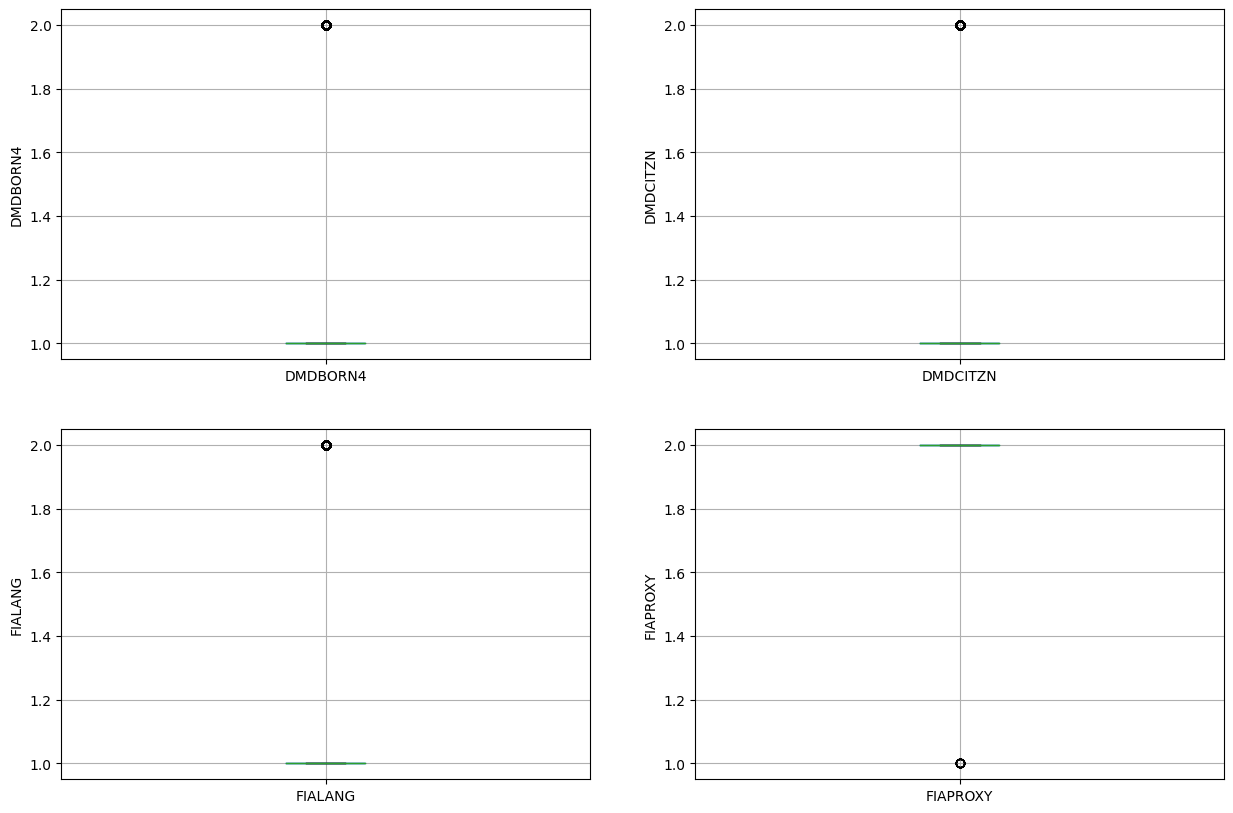

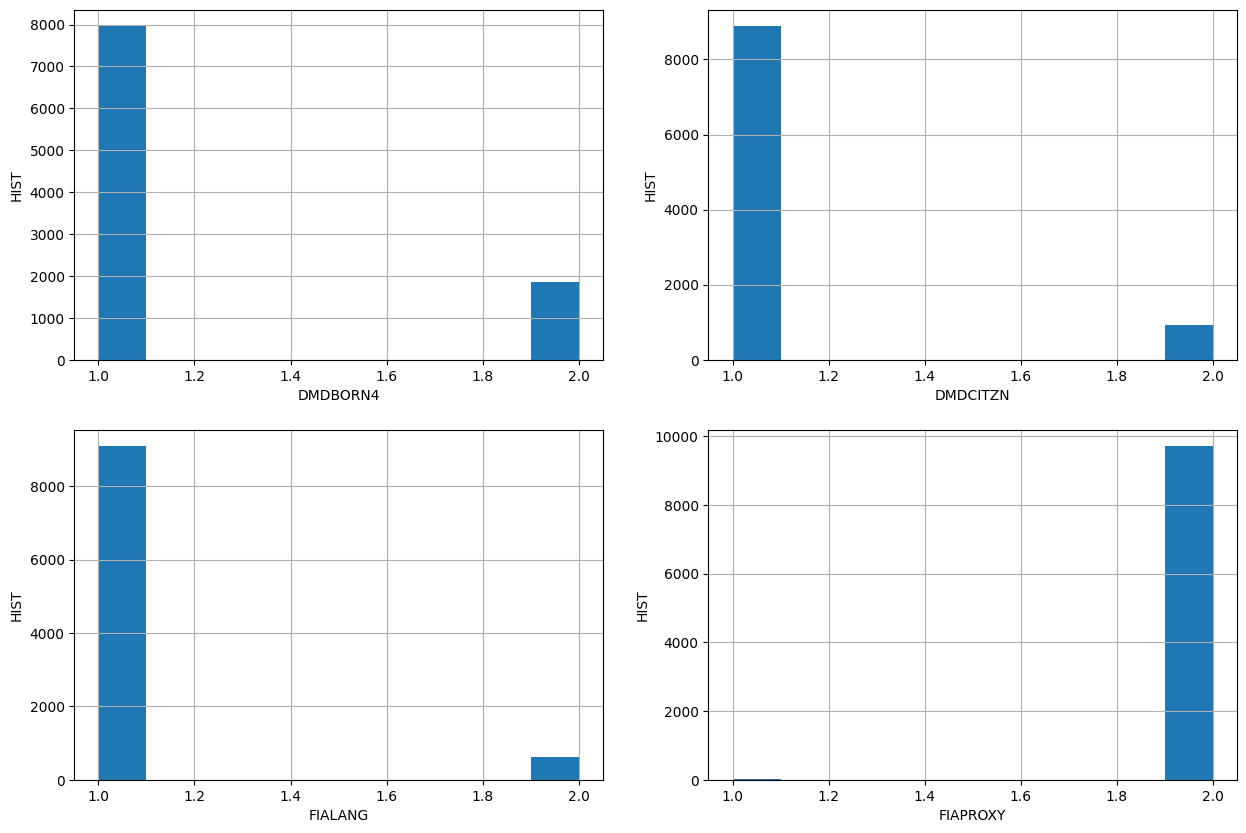

In [545]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = merged_df.boxplot(column='DMDBORN4')
fig.set_title('')
fig.set_ylabel('DMDBORN4')

plt.subplot(2, 2, 2)
fig = merged_df.boxplot(column='DMDCITZN')
fig.set_title('')
fig.set_ylabel('DMDCITZN')

plt.subplot(2, 2, 3)
fig = merged_df.boxplot(column='FIALANG')
fig.set_title('')
fig.set_ylabel('FIALANG')

plt.subplot(2, 2, 4)
fig = merged_df.boxplot(column='FIAPROXY')
fig.set_title('')
fig.set_ylabel('FIAPROXY')
plt.show()

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = merged_df.DMDBORN4.hist(bins=10)
fig.set_xlabel('DMDBORN4')
fig.set_ylabel('HIST')

plt.subplot(2, 2, 2)
fig = merged_df.DMDCITZN.hist(bins=10)
fig.set_xlabel('DMDCITZN')
fig.set_ylabel('HIST')

plt.subplot(2, 2, 3)
fig = merged_df.FIALANG.hist(bins=10)
fig.set_xlabel('FIALANG')
fig.set_ylabel('HIST')

plt.subplot(2, 2, 4)
fig = merged_df.FIAPROXY.hist(bins=10)
fig.set_xlabel('FIAPROXY')
fig.set_ylabel('HIST')
plt.show()

**Explanation:**

- Boxplots and histograms help visualize the distribution and detect outliers.
- Outliers can be handled by removing or transforming the data if necessary.

### **1.9. Prepare Target Variables**

Load and preprocess the target variables for Cancer and Liver disease.

In [546]:
target = pd.read_csv('./Dataset/questionnaire.csv')

pattern_9 = r'^9+$'
target = target.applymap(lambda x: replace_with_nan(x, pattern_9))

pattern_7 = r'^7+$'
target = target.applymap(lambda x: replace_with_nan(x, pattern_7))

liver_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ160L']]
cancer_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ220']]

cancer_values.dropna(subset=['MCQ220'], inplace=True)
liver_values.dropna(subset=['MCQ160L'], inplace=True)

final_liver_data = liver_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ160L'], axis=1)
final_cancer_data = cancer_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ220'], axis=1)

cancer_values = cancer_values.drop(['SEQN'], axis=1)
liver_values = liver_values.drop(['SEQN'], axis=1)

print(final_cancer_data.head())
print(final_liver_data.head())

   RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  \
0         1      69.0         4       4.0       1.0       1.0       1.0   
1         1      54.0         3       3.0       1.0       1.0       1.0   
2         1      72.0         3       3.0       2.0       1.0       1.0   
3         2      73.0         3       3.0       1.0       1.0       1.0   
4         1      56.0         1       1.0       1.0       1.0       1.0   

   SIALANG  SIAPROXY  SIAINTRP  ...  LBXHBC  LBDHBG  LBDHD  LBDHEG  LBDHEM  \
0        1       2.0         2  ...     1.0     2.0    2.0     2.0     2.0   
1        1       2.0         2  ...     2.0     2.0    2.0     2.0     2.0   
2        1       2.0         2  ...     2.0     2.0    2.0     2.0     2.0   
3        1       2.0         2  ...     2.0     2.0    2.0     2.0     2.0   
4        1       2.0         2  ...     2.0     2.0    2.0     2.0     2.0   

   LBXTC  LBDTCSI  LBXTTG  URXVOL1  URDFLOW1  
0  167.0     4.32     2.0     87.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\3186333528.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(lambda x: replace_with_nan(x, pattern_9))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\3186333528.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(lambda x: replace_with_nan(x, pattern_7))


In [547]:
merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,1,NaN,3,3.0,1.0,1.0,1.0,1,1.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


**Explanation:**

- The target variables `MCQ220` (Cancer) and `MCQ160L` (Liver) indicate the presence (`1`) or absence (`2`) of the respective diseases.
- Handle missing values by dropping rows with `NaN` in target variables.

---

## **2. Feature Engineering**

Transform raw data into meaningful features to enhance model performance.

### **2.1. Segregate Categorical and Numerical Features**


In [548]:
# # Identify categorical and numerical features for Cancer data
# cancer_categorical = final_cancer_data.select_dtypes(include=['object']).columns
# #print(final_cancer_data[cancer_categorical].head())

# cancer_numerical = final_cancer_data.select_dtypes(include=['number']).columns
# #print(final_cancer_data[cancer_numerical].head())

# # Identify categorical and numerical features for Liver data
# liver_categorical = final_liver_data.select_dtypes(include=['object']).columns
# #print(final_liver_data[liver_categorical].head())

# liver_numerical = final_liver_data.select_dtypes(include=['number']).columns
# #print(final_liver_data[liver_numerical].head())

# # print('There are {} numerical variables\n'.format(len(numerical)))
# # print('The numerical variables are :', numerical)
# #merged_df[numerical].head()

# # Identify categorical variables

In [549]:
object_cols = final_cancer_data.select_dtypes(include=['object']).columns.tolist()
    
    # Identify columns with dtype 'int64'
int_cols = final_cancer_data.select_dtypes(include=['int64']).columns.tolist()
    
    # Determine which int64 columns are categorical based on unique values using NumPy
categorical_int_cols = [
        col for col in int_cols
        if np.unique(final_cancer_data[col].values).size <= 10
    ]
    
    # Combine object columns and categorical int64 columns to form the categorical list
cancer_categorical = object_cols + categorical_int_cols
    
    # Identify numerical columns
float_cols = final_cancer_data.select_dtypes(include=['float64']).columns.tolist()
numerical_int_cols = [
        col for col in int_cols
        if np.unique(final_cancer_data[col].values).size > 10
    ]
cancer_numerical = float_cols + numerical_int_cols

In [550]:
object_cols = final_liver_data.select_dtypes(include=['object']).columns.tolist()
    
    # Identify columns with dtype 'int64'
int_cols = final_liver_data.select_dtypes(include=['int64']).columns.tolist()
    
    # Determine which int64 columns are categorical based on unique values using NumPy
categorical_int_cols = [
        col for col in int_cols
        if np.unique(final_liver_data[col].values).size <= 10
    ]
    
    # Combine object columns and categorical int64 columns to form the categorical list
liver_categorical = object_cols + categorical_int_cols
    
    # Identify numerical columns
float_cols = final_liver_data.select_dtypes(include=['float64']).columns.tolist()
numerical_int_cols = [
        col for col in int_cols
        if np.unique(final_liver_data[col].values).size > 10
    ]
liver_numerical = float_cols + numerical_int_cols

**Explanation:**

- Categorical features are typically of type `object` or have a limited number of unique integer values.
- Numerical features are of type `float64` or have many unique integer values.

### **2.2. Impute Missing Values**

#### **2.2.1. Numerical Features**

Use median imputation for numerical features to handle missing values.


In [551]:
# Impute missing values in Cancer numerical features
for col in cancer_numerical:
    col_median = final_cancer_data[col].median()
    final_cancer_data[col].fillna(col_median, inplace=True)

# Impute missing values in Liver numerical features
for col in liver_numerical:
    col_median = final_liver_data[col].median()
    final_liver_data[col].fillna(col_median, inplace=True)

#print(final_cancer_data[cancer_numerical].isnull().sum())
#print(final_liver_data[liver_numerical].isnull().sum())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\49068506.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_median, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\49068506.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [552]:
print(final_cancer_data[cancer_numerical].isnull().sum())

RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
SDMVSTRA    0
Length: 234, dtype: int64


In [553]:
print(final_liver_data[liver_numerical].isnull().sum())

RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
SDMVSTRA    0
Length: 234, dtype: int64


**Explanation:**

- Median imputation is robust to outliers and suitable for numerical data.
- Replace `NaN` values with the median of each column.

#### **2.2.2. Categorical Features**

Use mode imputation for categorical features to handle missing values.


In [554]:
# Impute missing values in Cancer categorical features
for col in cancer_categorical:
    col_mode = final_cancer_data[col].mode()[0]
    final_cancer_data[col].fillna(col_mode, inplace=True)

# Impute missing values in Liver categorical features
for col in liver_categorical:
    col_mode = final_liver_data[col].mode()[0]
    final_liver_data[col].fillna(col_mode, inplace=True)

#print(final_cancer_data[cancer_categorical].isnull().sum())
#print(final_liver_data[categorical].isnull().sum())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\4260844899.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_mode, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24236\4260844899.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [555]:
print(final_cancer_data[cancer_categorical].isnull().sum())

OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
dtype: int64


In [556]:
print(final_liver_data[liver_categorical].isnull().sum())

OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
dtype: int64


**Explanation:**

- Mode imputation fills missing categorical values with the most frequent category.
- Ensure no missing values remain after imputation.

### **2.3. Encode Categorical Variables**

Convert categorical variables into numerical format using one-hot encoding.


In [557]:
final_cancer_data = pd.get_dummies(final_cancer_data,columns=cancer_categorical,drop_first=True)
final_cancer_data.head()

,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,...,DMDHHSZE_3,DMDHRGND_2,SDMVPSU_2,DR1DRSTZ_2,DR1DRSTZ_5,PEASCST1_2,PEASCST1_3,BMDSTATS_2,BMDSTATS_3,BMDSTATS_4
0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,True,False,False,False,False,False,True,False
4,56.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [558]:
final_liver_data = pd.get_dummies(final_liver_data, columns=liver_categorical, drop_first=True)
final_liver_data.head()

,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,MIALANG,...,DMDHHSZE_3,DMDHRGND_2,SDMVPSU_2,DR1DRSTZ_2,DR1DRSTZ_5,PEASCST1_2,PEASCST1_3,BMDSTATS_2,BMDSTATS_3,BMDSTATS_4
0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,True,False,False,False,False,False,True,False
4,56.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [559]:
# final_cancer_data = pd.concat([final_cancer_data.drop(columns=cancer_categorical),
#                                pd.get_dummies(final_cancer_data[cancer_categorical], dtype=int)],
#                               axis=1)

# final_liver_data = pd.concat([final_liver_data.drop(columns=liver_categorical),
#                               pd.get_dummies(final_liver_data[liver_categorical], dtype=int)],
#                              axis=1)

In [560]:
# final_cancer_data.head()

In [561]:
# final_liver_data.head()

**Explanation:**

- Use `pd.get_dummies()` to convert categorical variables into binary indicators.
- This step is essential for feeding categorical data into the MLP.

### **2.4. Feature Selection**

Select the most relevant features based on correlation to reduce dimensionality and improve model performance.


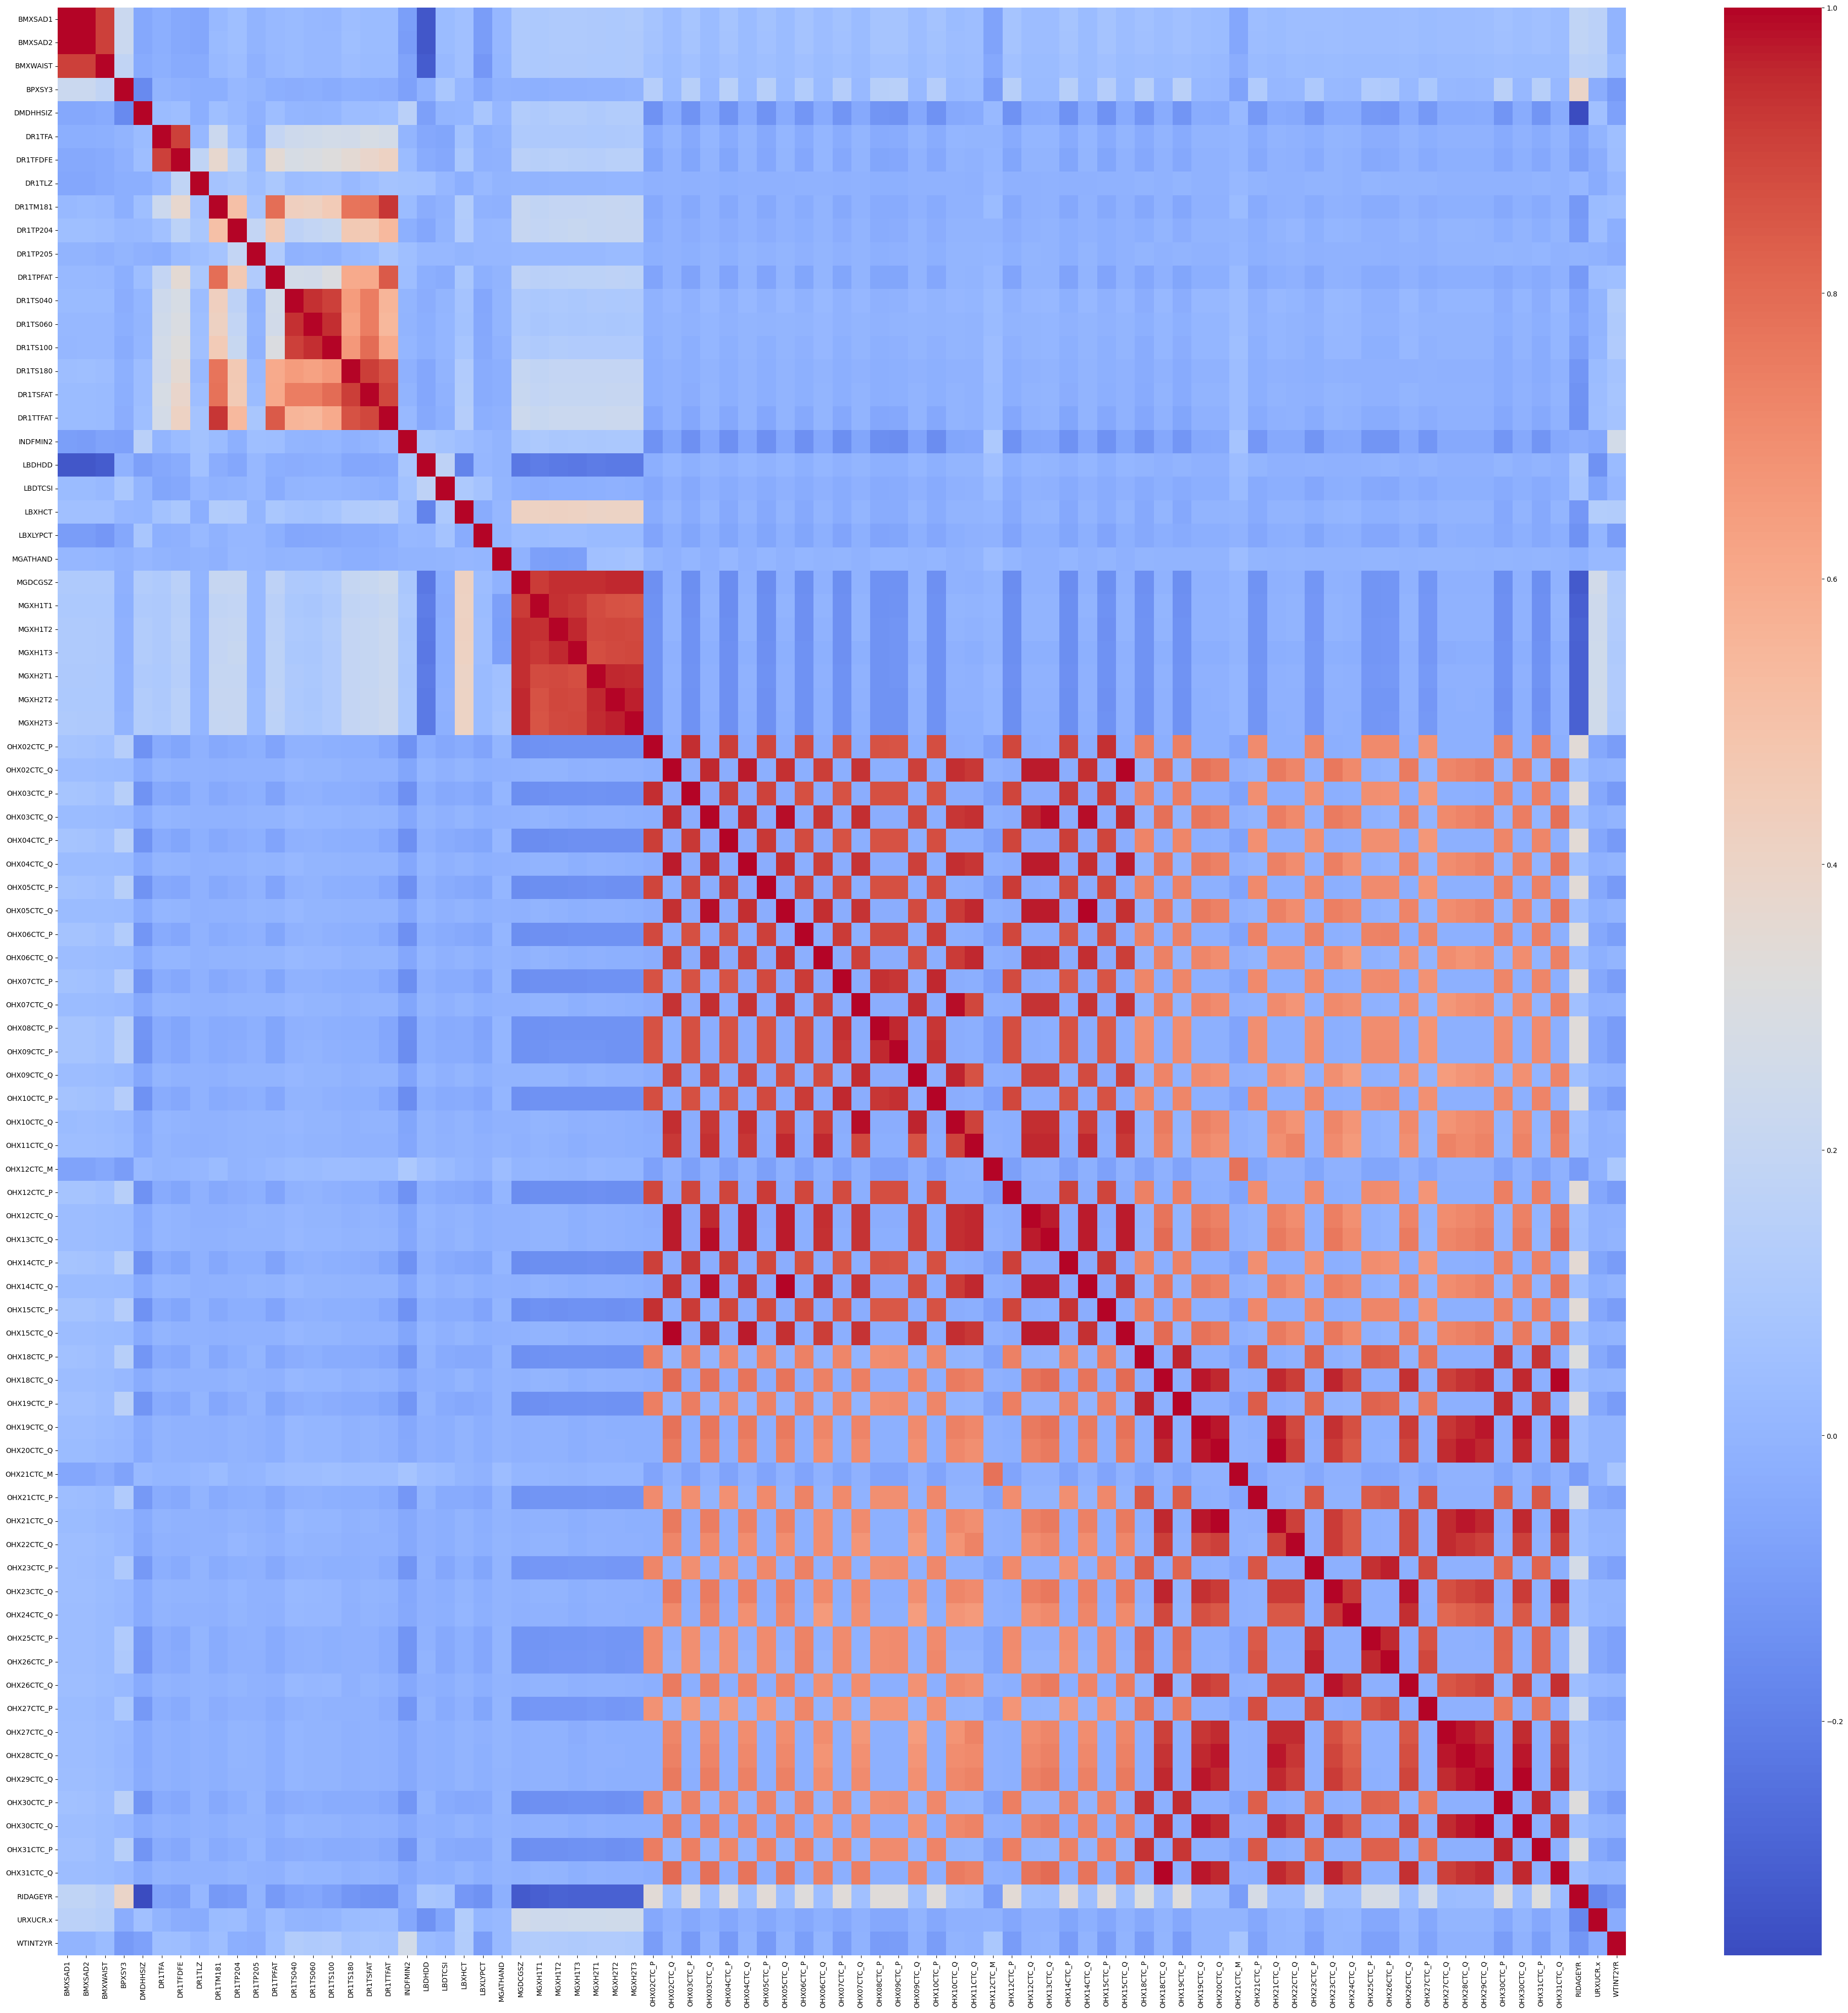

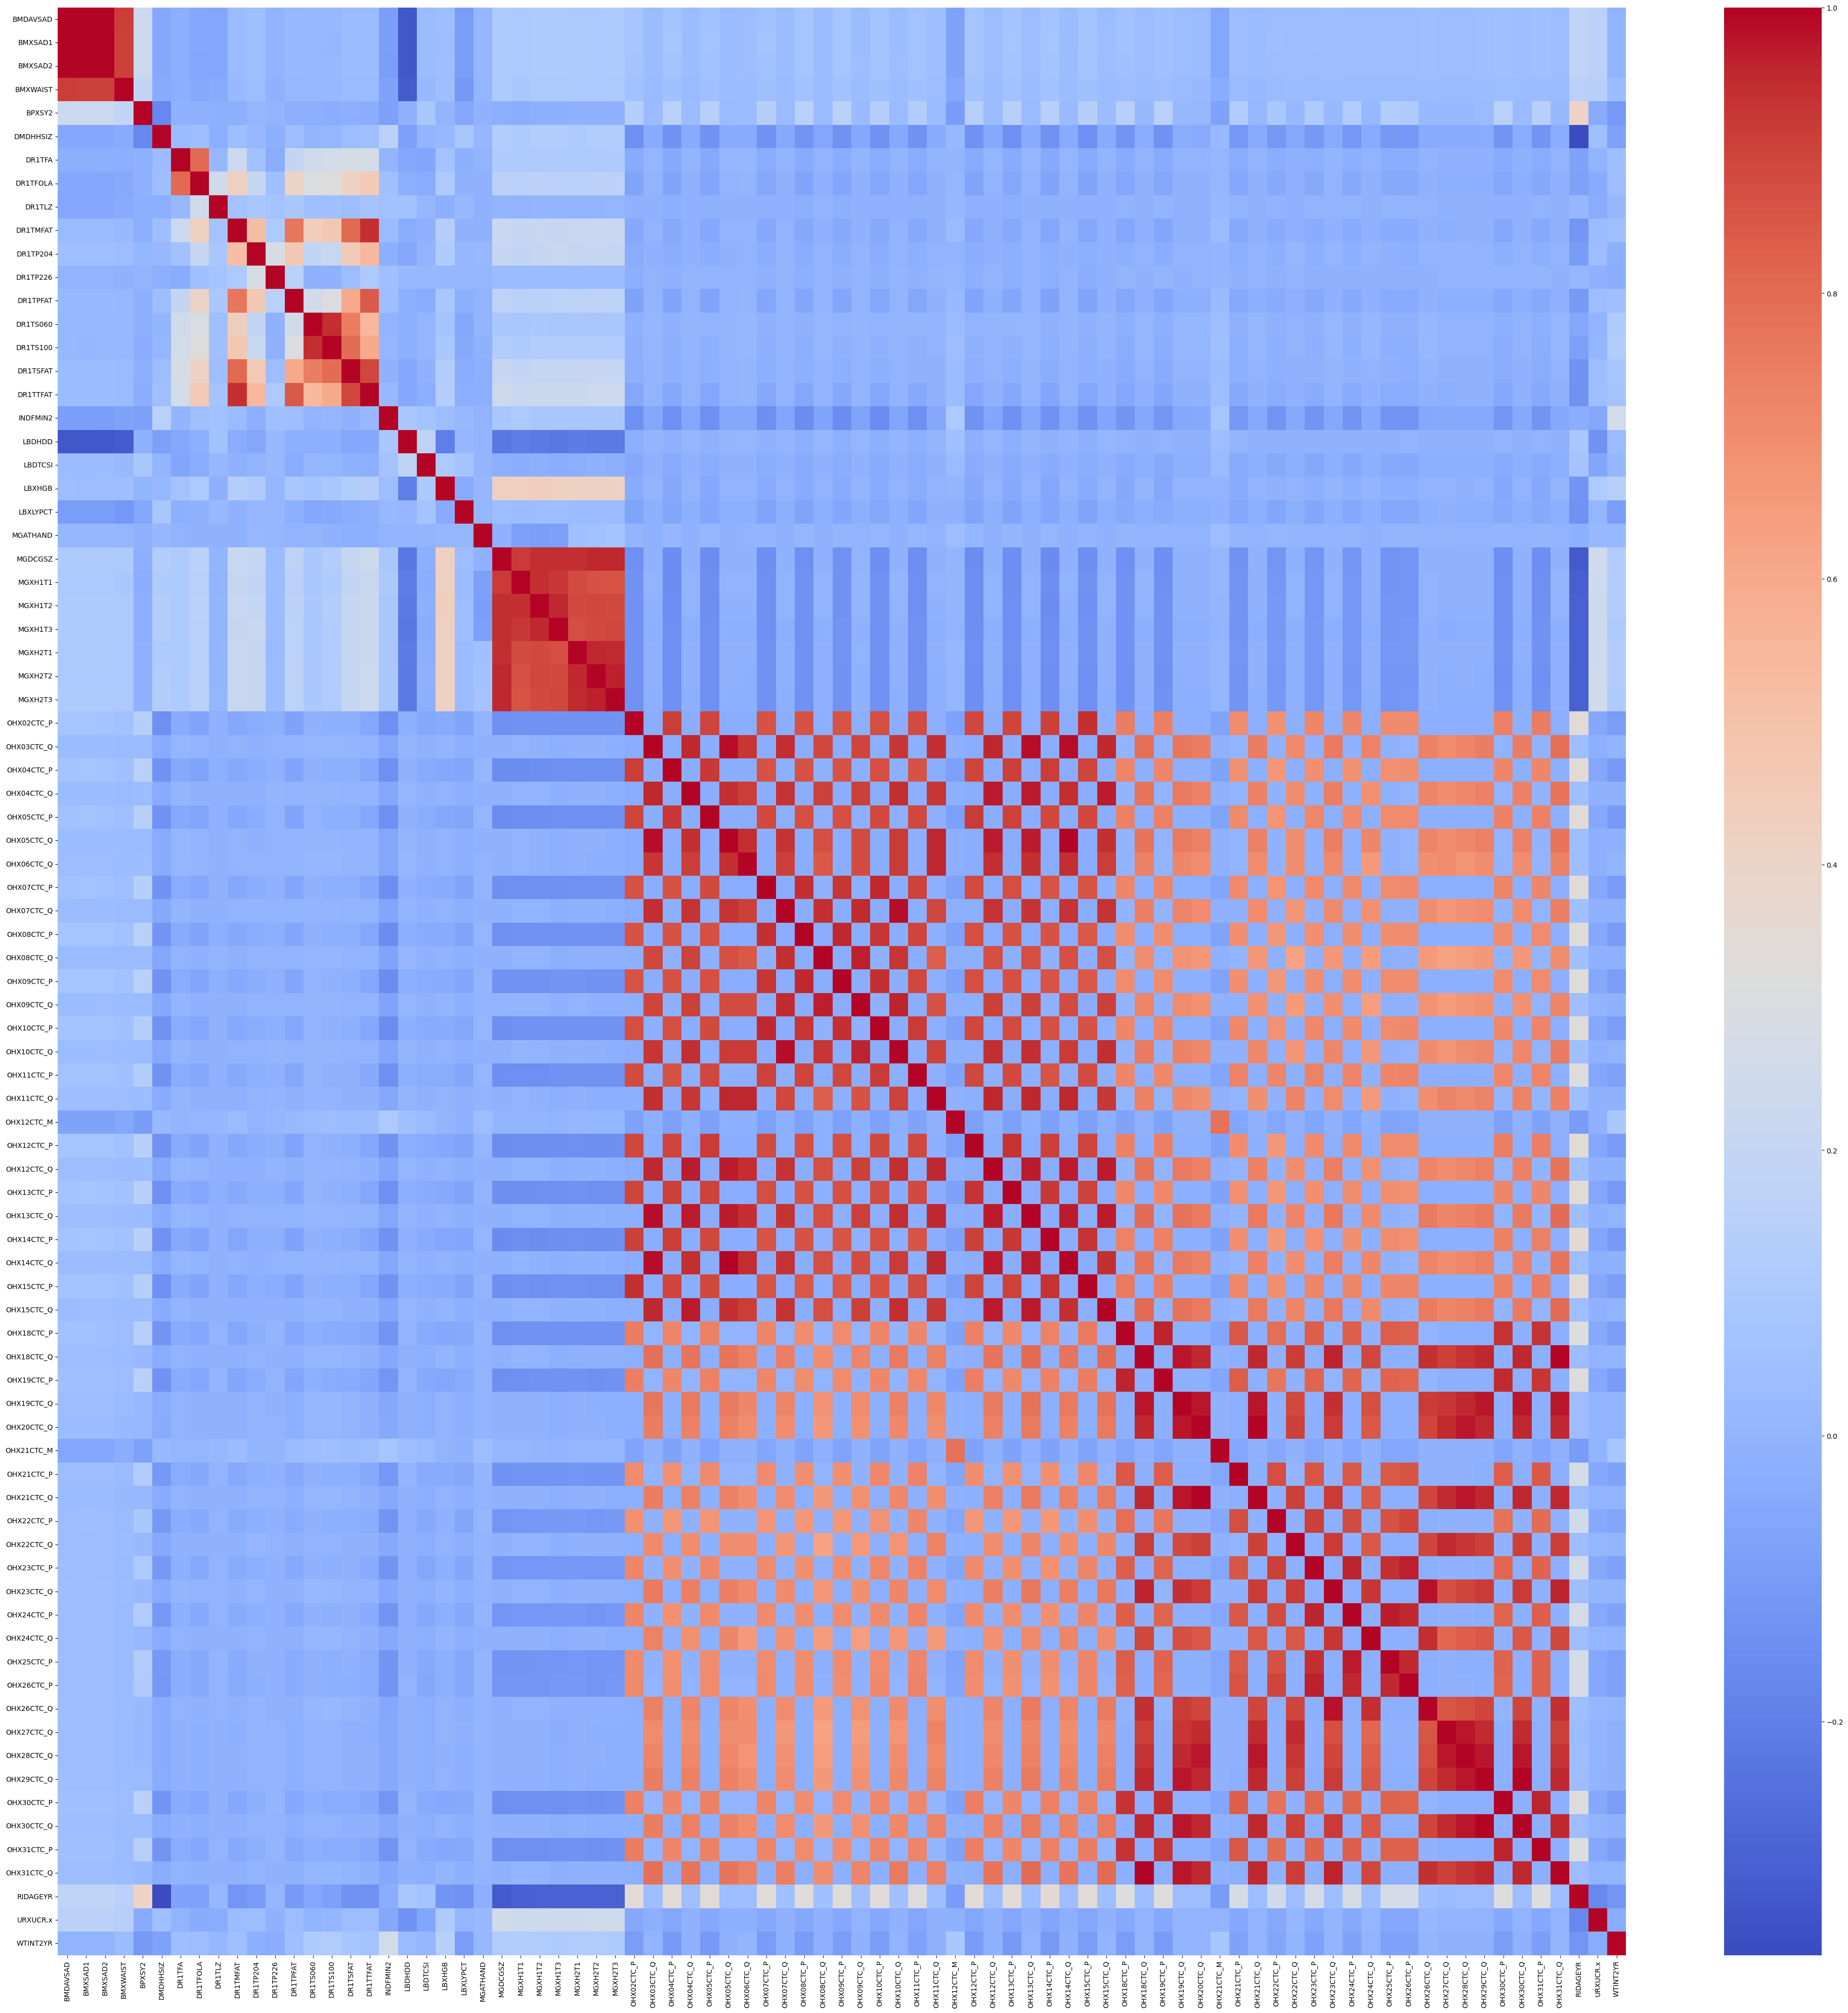

In [562]:
# Compute correlation matrices
cancer_corr_matrix = final_cancer_data.corr()
liver_corr_matrix = final_liver_data.corr()

# Plot heatmaps for Cancer data
abs_corr_matrix = np.abs(cancer_corr_matrix)
cancer_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = cancer_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_cancer_data[top_columns].corr()

plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Plot heatmaps for Liver data
abs_corr_matrix = np.abs(liver_corr_matrix)
liver_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_pairs = liver_corr_pairs[:1000]
unique_pairs = top_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_liver_data[top_columns].corr()

plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

**Explanation:**

- High correlation between features can lead to multicollinearity.
- Selecting a subset of features with high correlation to the target reduces complexity.

### **2.5. Select Top Features**

Choose 150 features based on their correlation with the target variable.

#### **2.5.1. Cancer Data**


In [563]:
import random

# Set correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
correlation_matrix = final_cancer_data.corr()

# Identify pairs of highly correlated features
high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]
# Initialize set for selected features
selected_features = set()

# Select features based on high correlation
for col1, col2, corr in high_corr_pairs:
    selected_feature = random.choice([col1, col2])
    selected_features.add(selected_feature)
    if len(selected_features) == 150:
        break

# Warning if less than 150 features are selected
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create DataFrame with selected features
selected_cancer_df = final_cancer_data[list(selected_features)]

#### **2.5.2. Liver Data**

In [564]:
# Set correlation threshold
threshold = 0.8

# Get pairs with correlation higher than threshold
correlation_matrix = final_liver_data.corr()
high_corr_pairs = high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]

# Initialize set for selected features
selected_features = set()

# Select features based on high correlation
for col1, col2, corr in high_corr_pairs:
    selected_feature = random.choice([col1, col2])
    selected_features.add(selected_feature)
    if len(selected_features) == 150:
        break

# Warning if less than 150 features are selected
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create DataFrame with selected features
selected_liver_df = final_liver_data[list(selected_features)]

**Explanation:**

- Features with a correlation higher than the threshold are considered.
- Randomly select one feature from highly correlated pairs to avoid redundancy.
- Ensure that 150 features are selected; adjust the threshold if necessary.

### **2.6. Scale the Features and Apply PCA**

Normalize the data and reduce dimensionality using Principal Component Analysis (PCA).


In [565]:
# Scale and apply PCA for Liver data
cols = selected_liver_df.columns
scaler = StandardScaler()
selected_liver_df = scaler.fit_transform(selected_liver_df)
selected_liver_df = pd.DataFrame(selected_liver_df, columns=cols)

pca = PCA(0.90)
liverprincipalComponents = pca.fit_transform(selected_liver_df)
liverprincipalDf = pd.DataFrame(data=liverprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, liverprincipalComponents.shape[1] + 1)])
liverprincipalDf.head()

# Scale and apply PCA for Cancer data
cols = selected_cancer_df.columns
scaler = StandardScaler()
selected_cancer_df = scaler.fit_transform(selected_cancer_df)
selected_cancer_df = pd.DataFrame(selected_cancer_df, columns=cols)

pca = PCA(0.90)
cancerprincipalComponents = pca.fit_transform(selected_cancer_df)
cancerprincipalDf = pd.DataFrame(data=cancerprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, cancerprincipalComponents.shape[1] + 1)])
cancerprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,Principal Component 33,Principal Component 34,Principal Component 35
0,18.376021,-3.278086,-0.677321,-0.495997,1.218252,-0.284665,0.938365,-0.922284,-0.962136,-1.543689,...,-0.013123,0.201344,-0.187379,-0.599168,-0.176781,0.573501,-0.411008,-0.774579,-1.695889,-0.517689
1,-3.792226,0.465586,15.008962,-3.311988,-4.269235,8.951402,0.893808,1.745083,0.274741,0.389903,...,1.164618,-0.442951,-2.776204,1.158145,2.826681,-0.026479,-1.099942,1.466877,0.461231,1.092216
2,-1.906365,0.013603,-0.990108,2.882256,2.098388,-1.483246,0.656131,-0.205127,0.613454,1.474851,...,1.140606,-0.247183,0.051853,-0.559734,-0.608483,-0.615026,-1.460733,0.130045,-0.038197,1.345563
3,1.102526,-0.142829,-4.902663,-3.432113,-1.368181,-0.198870,2.474436,-0.224991,1.328736,3.709886,...,0.815075,-0.373168,-0.529045,-0.990962,-1.567181,-0.124745,0.100974,0.525473,0.881472,1.069582
4,1.321093,0.200983,-0.097853,3.405759,-4.130086,1.574545,1.733145,-1.956387,0.870363,1.201069,...,1.163722,-0.031425,0.773812,0.275818,-0.557236,-1.339662,0.029542,-0.281764,0.233979,2.309511


**Explanation:**

- `StandardScaler` standardizes features by removing the mean and scaling to unit variance.
- PCA reduces the number of features while retaining 90% of the variance, simplifying the model.

### **2.7. Encode Target Labels**

Convert target labels from `1` and `2` to `0` and `1`.


In [566]:
# Convert Cancer labels: 1 -> 1 (present), 2 -> 0 (absent)
cancer_values["MCQ220"] = cancer_values["MCQ220"].replace({ 1: 1, 2: 0 })
cancer_values.head()

# Convert Liver labels: 1 -> 1 (present), 2 -> 0 (absent)
liver_values["MCQ160L"] = liver_values["MCQ160L"].replace({ 1: 1, 2: 0 })
liver_values.head()

,MCQ160L
0,0.0
1,0.0
2,0.0
4,0.0
5,0.0


**Explanation:**

- Binary classification requires labels to be `0` and `1`.
- Replace `2` with `0` to indicate absence of disease.

### **2.8. Split the Data into Training and Testing Sets**

Divide the dataset into training and testing subsets.


In [567]:
# Split Cancer data
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(
    cancerprincipalDf, cancer_values, test_size=0.2, random_state=0)

# Split Liver data
liver_x_train, liver_x_test, liver_y_train, liver_y_test = train_test_split(
    liverprincipalDf, liver_values, test_size=0.2, random_state=0)

print(cancer_x_train.shape, cancer_x_test.shape, liver_x_train.shape, liver_x_test.shape)

(4470, 35) (1118, 35) (4463, 35) (1116, 35)


**Explanation:**

- Use an 80/20 split for training and testing.
- Ensures that the model is trained on a majority of the data and tested on unseen data.

### **2.9. Handle Class Imbalance**

Use under-sampling to balance the classes in the training data.


In [568]:
# Under-sampling for Liver dataset
rus = RandomUnderSampler(random_state=0)
liver_x_resampled, liver_y_resampled = rus.fit_resample(liver_x_train, liver_y_train)

# Under-sampling for Cancer dataset
rus = RandomUnderSampler(random_state=0)
cancer_x_resampled, cancer_y_resampled = rus.fit_resample(cancer_x_train, cancer_y_train)

**Explanation:**

- Imbalanced datasets can bias the model towards the majority class.
- Under-sampling reduces the size of the majority class to balance the dataset.

---

## **3. Implementing MLP from Scratch**

In this section, you will implement a simple MLP with one hidden layer using NumPy. The network will consist of an input layer, a hidden layer with 10 neurons, and an output layer. The sigmoid activation function will be used, and Binary Cross-Entropy will be the loss function.

### **3.1. Define Data Preprocessor Class**

This class handles splitting the resampled data into training and validation sets.

In [569]:
class DataPreprocessor:
    def __init__(self):
        '''
        Initialize with resampled training data and test data
        '''
        self.X = cancer_x_resampled.values
        self.y = cancer_y_resampled.values
        self.X_test = cancer_x_test.values
        self.y_test = cancer_y_test.values

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

**Explanation:**

- Initializes with resampled training data (`X` and `y`) and test data.
- Splits the training data further into training and validation sets for monitoring overfitting.

### **3.2. Define MLP Class**

This class defines the structure and operations of the MLP.


In [570]:
# class MLP:
#     def __init__(self, input_size, hidden_size, output_size):
#         '''
#         Initialize weights and biases
#         '''
#         self.weights1 = np.random.rand(hidden_size)
#         self.bias1 = np.ones(hidden_size)
#         self.weights2 =  np.random.rand(output_size)
#         self.bias2 = np.ones(output_size)

#     def sigmoid(self, x):
#         '''
#         Implement the sigmoid activation function
#         '''
#         return  1/(1 + np.exp(-x))
#         # return if x > 0.5 x==1 else x ==0

#     def sigmoid_derivative(self, x):
#         '''
#         Implement the derivative of the sigmoid function
#         '''
#         #return self.sigmoid(x)*(1-self.sigmoid(x)) 
#         return x * (1 - x)
#     def forward(self, X):
#         '''
#         Perform forward propagation
#         '''
#         self.activation = np.dot(X, self.weights1) + self.bias1
#         self.output_hidden = self.sigmoid(self.activation)
#         self.output = np.dot(self.output_hidden,self.weights2)+self.bias2
#         self.predict = self.sigmoid(self.output)
#         return self.predict

#     def backward(self, X, y, output, learning_rate):
#         '''
#         Perform backward propagation and update weights and biases
#         '''
#         output_error = y - self.predicted
#         output_delta = output_error * self.sigmoid_derivative(self.predicted)
#         # Compute the hidden layer error
#         hidden_error = np.dot(output_delta, self.weights2.T)
#         hidden_delta = hidden_error * self.sigmoid_derivative(self.output_hidden)

#         #update weights
#         self.weights_hidden_output += np.dot(self.output_hidden.T, output_delta) * learning_rate
#         self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
#         self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
#         self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

In [571]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with small random numbers
        self.weights1 = np.random.normal(0, 0.01, (input_size, hidden_size))
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.normal(0, 0.01, (hidden_size, output_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        # Calculate errors and gradients
        m = X.shape[0]
        
        # Output layer error
        dz2 = output - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer error
        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights and biases with learning rate subtraction
        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


**Explanation:**

- **Initialization (`__init__`):**
  - Initialize weights with small random values.
  - Initialize biases with zeros.
  
- **Activation Functions:**
  - `sigmoid`: Activation function for neurons.
  - `sigmoid_derivative`: Derivative used during backpropagation.
  
- **Forward Propagation (`forward`):**
  - Compute activations for hidden and output layers.
  
- **Backward Propagation (`backward`):**
  - Compute gradients and update weights and biases using Stochastic Gradient Descent (SGD).

### **3.3. Define Trainer Class**

This class handles the training process, including batching, loss calculation, and accuracy monitoring.

In [572]:

class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train.reshape(-1, 1)  # Ensure y is 2D
        self.X_val = X_val
        self.y_val = y_val.reshape(-1, 1)      # Ensure y is 2D
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]

            for i in range(0, m, self.batch_size):
                # Get the current batch
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Forward pass
                output = self.model.forward(X_batch)

                # Backward pass
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate training loss and accuracy
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(self.y_train * np.log(train_output) + (1 - self.y_train) * np.log(1 - train_output))
            train_accuracy = np.mean((train_output > 0.5) == self.y_train)

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(self.y_val * np.log(val_output) + (1 - self.y_val) * np.log(1 - val_output))
            val_accuracy = np.mean((val_output > 0.5) == self.y_val)

            # Store the metrics
            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

**Explanation:**

- **Training Process (`train`):**
  - Shuffles the data at each epoch to ensure randomness.
  - Processes data in batches for efficient computation.
  - Performs forward and backward passes to update the model.
  - Calculates and stores loss and accuracy for both training and validation sets.
  
- **Plotting Results (`plot_results`):**
  - Visualizes the loss and accuracy over epochs to monitor training progress and detect overfitting.

### **3.4. Define Tester Class**

This class evaluates the trained model on the test dataset.


In [573]:
class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        Perform testing by forwarding test data through the model and computing loss and accuracy
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(self.y_test * np.log(test_output) + (1 - self.y_test) * np.log(1 - test_output))
        test_accuracy = np.mean((test_output > 0.5) == self.y_test)

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output

**Explanation:**

- **Testing Process (`test`):**
  - Performs a forward pass with the test data.
  - Computes the Binary Cross-Entropy loss and accuracy.
  - Prints and returns the test results.

---

## **4. Training and Evaluating the Model**

Finally, you will tie everything together to train and evaluate your MLP model.

### **4.1. Main Execution**

Epoch 10/64, Train Loss: 0.6856, Train Acc: 0.5542, Val Loss: 0.6823, Val Acc: 0.5185
Epoch 20/64, Train Loss: 0.6136, Train Acc: 0.6827, Val Loss: 0.5902, Val Acc: 0.7099
Epoch 30/64, Train Loss: 0.5733, Train Acc: 0.7059, Val Loss: 0.5593, Val Acc: 0.7037
Epoch 40/64, Train Loss: 0.5616, Train Acc: 0.7167, Val Loss: 0.5580, Val Acc: 0.6975
Epoch 50/64, Train Loss: 0.5547, Train Acc: 0.7260, Val Loss: 0.5629, Val Acc: 0.7099
Epoch 60/64, Train Loss: 0.5483, Train Acc: 0.7384, Val Loss: 0.5703, Val Acc: 0.7099


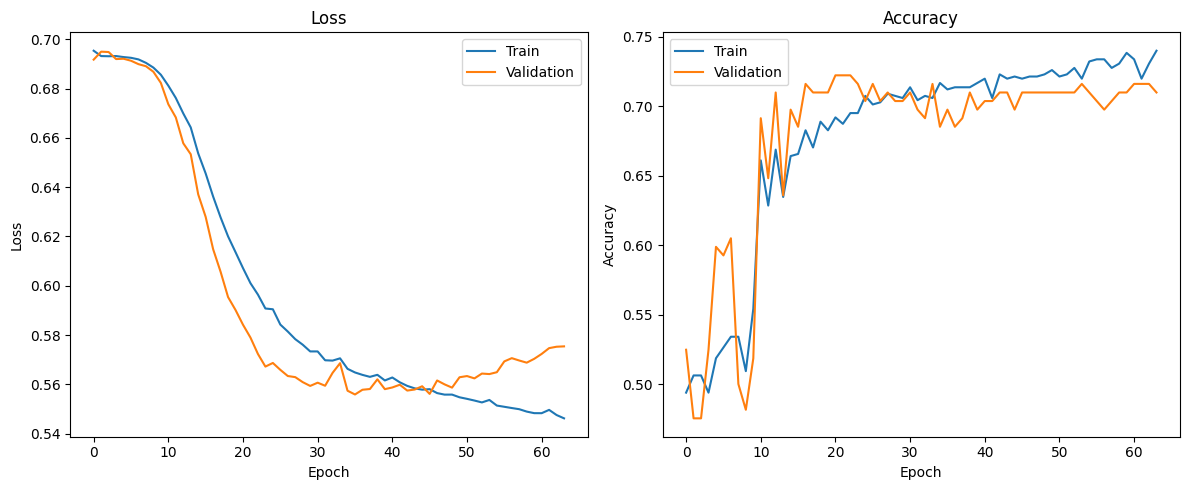

Test Loss: 0.5956, Test Accuracy: 0.6762

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


In [574]:
# Main execution
if __name__ == "__main__":
    # Preprocess data
    preprocessor = DataPreprocessor()
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=64, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot training results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = np.argmax(preprocessor.y_test[i])
        predicted_label = np.argmax(test_output[i])
        print(f"True: {true_label}, Predicted: {predicted_label}")

**Explanation:**

- **Data Preprocessing:**
  - Initializes the `DataPreprocessor` and splits the data.
  
- **Model Initialization and Training:**
  - Initializes the `MLP` with appropriate sizes.
  - Creates a `Trainer` instance and trains the model.
  
- **Plotting Results:**
  - Visualizes the training and validation loss and accuracy.
  
- **Testing:**
  - Evaluates the model on the test dataset.
  - Prints example predictions to compare true and predicted labels.

---

## **5. Instructions for Completing the Assignment**

Throughout the notebook, you will encounter `##TODO` sections. Your tasks are to:

1. **Load and Merge Datasets:**
   - Use `pd.read_csv()` to load each CSV file into a DataFrame.
   - Merge the DataFrames on the `SEQN` column using `pd.merge()`.

2. **Identify and Drop Columns:**
   - Use `.nunique()` to find columns with a single unique value.
   - Drop these columns using `.drop()`.

3. **Handle Missing Values:**
   - Implement the `replace_with_nan` function to replace specific patterns with `NaN`.
   - Use `.applymap()` to apply this function across the DataFrame.
   - Drop columns with more than 30% missing values.

4. **Segregate Numerical and Categorical Variables:**
   - Identify numerical columns (typically `float64` or `int64` with many unique values).
   - Identify categorical columns (typically `object` or `int64` with few unique values).

5. **Impute Missing Values:**
   - For numerical columns, compute the median and replace `NaN` values.
   - For categorical columns, compute the mode and replace `NaN` values.

6. **Encode Categorical Variables:**
   - Use `pd.get_dummies()` to perform one-hot encoding on categorical columns.

7. **Feature Selection:**
   - Compute the correlation matrix using `.corr()`.
   - Select top features based on correlation threshold.
   - Ensure that 150 features are selected, adjusting the threshold if necessary.

8. **Scale and Apply PCA:**
   - Use `StandardScaler` to normalize the data.
   - Apply PCA to reduce dimensionality while retaining 90% variance.

9. **Encode Target Labels:**
   - Convert disease labels from `1` and `2` to `0` and `1`.

10. **Handle Class Imbalance:**
    - Use `RandomUnderSampler` to balance the classes in the training data.

11. **Implement MLP:**
    - Initialize weights and biases with appropriate dimensions and values.
    - Implement the sigmoid activation function and its derivative.
    - Perform forward and backward propagation.
    - Update weights and biases using gradients.

12. **Train and Evaluate the Model:**
    - Train the MLP using the `Trainer` class.
    - Plot the loss and accuracy curves.
    - Test the model and evaluate its performance.

---

## **Submission Guidelines**

- **Notebook Completion:** Ensure all `##TODO` sections are properly implemented.
- **Code Quality:** Write clean, readable, and well-documented code.
- **Visualizations:** Include relevant plots for EDA and training progress.
- **Report:** Summarize your findings, challenges faced, and insights gained from the model's performance.

---

Good luck with your assignment! If you have any questions or need further clarifications, feel free to reach out.